In [1]:
import bilby
import os
import glob
import numpy as np
from scipy import interpolate
import utilizes_plot
import corner.corner
import scienceplots
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = ['serif']
mpl.rcParams['font.serif'] = ['Times New Roman']
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])

In [2]:
mrms_data_label=['ns_obs','ana_corrected_mrms_87','phe_corrected_mrms_87','ana_corrected_mr_53','phe_corrected_mr_53','mr_obs_53','ms_34']
############# j=   0                1                       2                      3                       4                  5      6
sub_model_name_list=['turn_on_pow','turn_on_pow_fix','turn_on_pow_G','pow', '2G','turn_on_pow_G_fixed_max','G','2G_fixed_max', 'sst', 'G_fixed_max', '2G_fixed_min','2G_fixed_max_min','logu','3G_fixed_max_min','lognorm','gamma', 'U','G_fixed_max_min']
############ i=           0(4)       1(3)                2(7)         3(3)   4(7)            5(6)          6(4)       7(6)     8(4)        9(3)            10(6)              11(5)     12(2)      13(8)           14(2)    15(2)  16(2)      17(2)   
data_name_labes=[r'$\rm{OBS}$',r'$\rm{ANA}$',r'$\rm{PHE}$',r'$\rm{ANA_{m_r}}$',r'$\rm{PHE_{m_r}}$',r'$\rm{m_r}$',r'$\rm{m_s}$']
model_name_label=[r'$\rm{TOP}$',r'$\rm{TOP_{min}}$',r'$\rm{TOPG}$',r'$\rm{POW}$',r'$\rm{2G^{max}_{min}}$',r'$\rm{TOPG_{min}}$',r'$\rm{G^{max}_{min}}$',r'$\rm{2G_{min}}$',r'$\rm{SST}$',r'$\rm{G_{min}}$',r'$\rm{2G_{max}}$',r'$\rm{2G}$',r'$\rm{LogU}$',r'$\rm{3G}$',r'$\rm{LogN}$',r'$\rm{Gamma}$',r'$\rm{U}$',r'$\rm{G}$']
###########
main_direct='/home/yzq/Documents/NS_mass/BNU/NS_mass/NS_sci/NS_mass_2023/'
##########
post_data_model_top={}
data_sets={}
i=0
for j in [1,2]:
    os.path.exists(main_direct+'{}/{}/hy_outdir/*.json'.format(mrms_data_label[j],sub_model_name_list[i]) )
    fnames= glob.glob( main_direct+'{}/{}/hy_outdir/*.json'.format(mrms_data_label[j],sub_model_name_list[i])  )
    fname=fnames[0]
    re=bilby.result.read_in_result( fname )
    temp_post=((re.posterior).iloc[:,0:-2]).values 
    post_data_model_top["post_"+str(mrms_data_label[j])+'_'+str(sub_model_name_list[i])]=temp_post
    
    os.path.exists(main_direct + '{}.txt'.format(mrms_data_label[j]) )
    data_names=glob.glob(main_direct + '{}.txt'.format(mrms_data_label[j]) )
    datname=data_names[0]
    data_sets['data_'+str(mrms_data_label[j])]=np.loadtxt(main_direct + '{}.txt'.format(mrms_data_label[j]) )

In [3]:
#ppd for turn on power law
i=0 #top
mass_model=eval('utilizes_plot.hyper_prior_{}'.format(sub_model_name_list[i]) )
def ppd_top(x,pos_p):
    mar=list()
    row, col=pos_p.shape
    for i in range(row):
        ma = mass_model(np.array(x),pos_p[i,0],pos_p[i,1],pos_p[i,2],pos_p[i,3]) 
        mar.append(ma) 
    return np.sum(np.array(mar),axis=0)/row

def errbar_top(x,pos_p):
    mar=list()
    row, col=pos_p.shape
    for i in range(row):
        ma=mass_model(np.array(x),pos_p[i,0],pos_p[i,1],pos_p[i,2],pos_p[i,3]) 
        mar.append(ma)
    return np.quantile(np.array(mar),np.array([0.05 , 0.95]), axis=0)

In [4]:
mii=np.linspace(0.8,3,400)
i=0
j=1
ana_ppd_TOP=ppd_top(mii,post_data_model_top["post_"+str(mrms_data_label[j])+'_'+str(sub_model_name_list[i])])
ana_err_TOP=errbar_top(mii,post_data_model_top["post_"+str(mrms_data_label[j])+'_'+str(sub_model_name_list[i])])
data_ana=data_sets['data_'+str(mrms_data_label[j])]

In [5]:
hfs_ppd_TOP=ana_ppd_TOP
hfs_err_TOP=ana_err_TOP
data_hfs   =data_ana

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'se

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


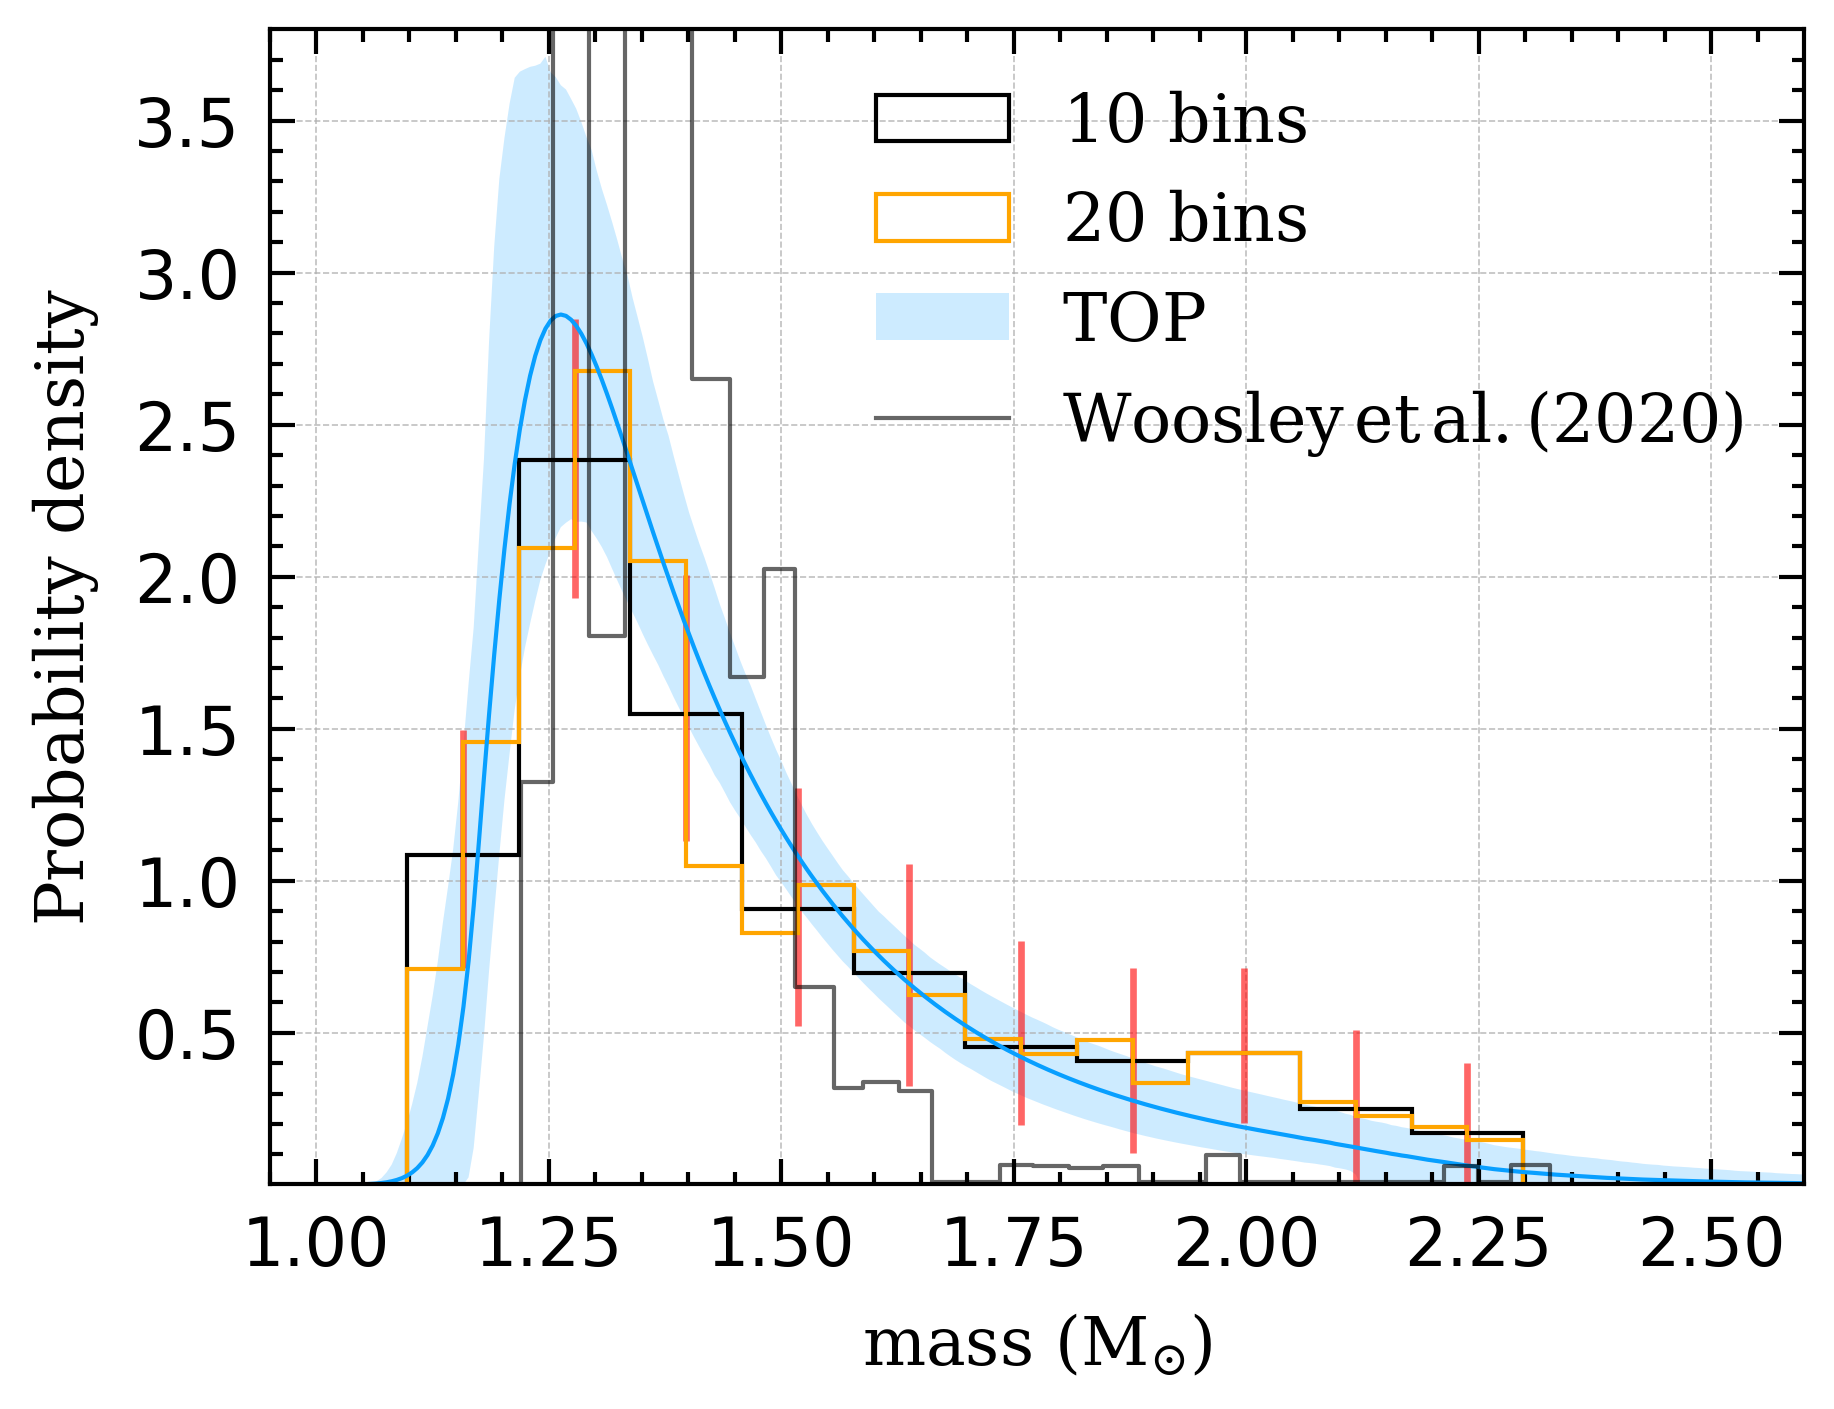

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])
plt.grid(b=True,linestyle='--',lw=0.2,alpha=0.8)

li_data=abs(data_hfs)
n_samp=10000
ne=int(len(data_hfs)/n_samp)
x=mii
dm=0.12
start_m=1.098
nbin=10


li_hist_data=np.zeros((n_samp,ne))
li_all_hist=np.zeros((n_samp,nbin))
li_mean=np.zeros(ne)
for i in range(ne):
    li_hist_data[:,i] = li_data[i*n_samp:(i+1)*n_samp]
    li_mean[i]=np.mean(li_data[i*n_samp:(i+1)*n_samp])
    
standar_bins_edges=np.zeros(nbin+1)
for i in range(nbin+1):
    standar_bins_edges[i]= start_m + i*dm

for j in range(n_samp):
    yj,standar_bins_edgesj =np.histogram(li_hist_data[j,:],standar_bins_edges,density=1)
    li_all_hist[j,:]=yj

quan_data=np.zeros((3,nbin))
err_low_up=np.zeros((2,nbin))
quan_data=np.quantile(np.array(li_all_hist),np.array([0.05 , 0.95, 0.5]), axis=0)#1-sigma[0.16,0.84]


err_low_up[0,:]=quan_data[2,:] - quan_data[0,:]
err_low_up[1,:]=quan_data[1,:] - quan_data[2,:]


bins_wide=(standar_bins_edges[1] - standar_bins_edges[0])
bins_cen=standar_bins_edges[:-1]+(standar_bins_edges[1] - standar_bins_edges[0])/2

#plt.bar(bins_cen, quan_data[2,:], width=bins_wide, align='center', facecolor='none',edgecolor='k',lw=0.5,label=r'$\rm{Li21}$')
plt.errorbar(bins_cen, quan_data[2,:], yerr=err_low_up,fmt='none',color='r',lw=0.8,alpha=0.6) #or none for no line and ponits

##part 2
standar_bins_edges=np.zeros(11)
for i in range(10+1): #bins_edges more than one size compared bins
    standar_bins_edges[i]= start_m + i*dm
plt.hist(li_data,bins=standar_bins_edges,histtype='step',ls='-',color='black',lw=0.5,density=True,label=r'$\rm{10\,\,bins}$')

more_bins_edges=np.zeros(21)
for j in range(21):
    more_bins_edges[j]=start_m + j*(dm/2)
plt.hist(li_data,bins=more_bins_edges,histtype='step',ls='-',color='orange',lw=0.5,density=True,label=r'$\rm{20\,\,bins}$')


plt.plot(x, hfs_ppd_TOP, ls='-',color='#089FFF',lw=0.5)
plt.fill_between(x, hfs_err_TOP[0,:], hfs_err_TOP[1,:],alpha=0.2, facecolor='#089FFF',label=r'$\rm{TOP}$')

###woosley
woos=np.loadtxt('/home/yzq/Documents/NS_mass/BNU/NS_mass/lowblueT.txt')
plt.plot(woos[:,0],woos[:,1],ls='-',lw=0.5,color='k',alpha=0.6,label=r'$\rm{Woosley \, et \, al.(2020)}$')
##woolsley end 

plt.xlabel(r'$\rm{mass\,\, (M_{\odot})}$')
plt.ylabel(r'$\rm{Probability\,\,density}$')
plt.xlim(0.95,2.6)
#plt.ylim(0,0.6)
#plt.yscale('log')
plt.ylim(0.001,3.8)
plt.legend(loc='upper right')
plt.savefig('hist_ppd_err_ana_woosley.jpg')

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


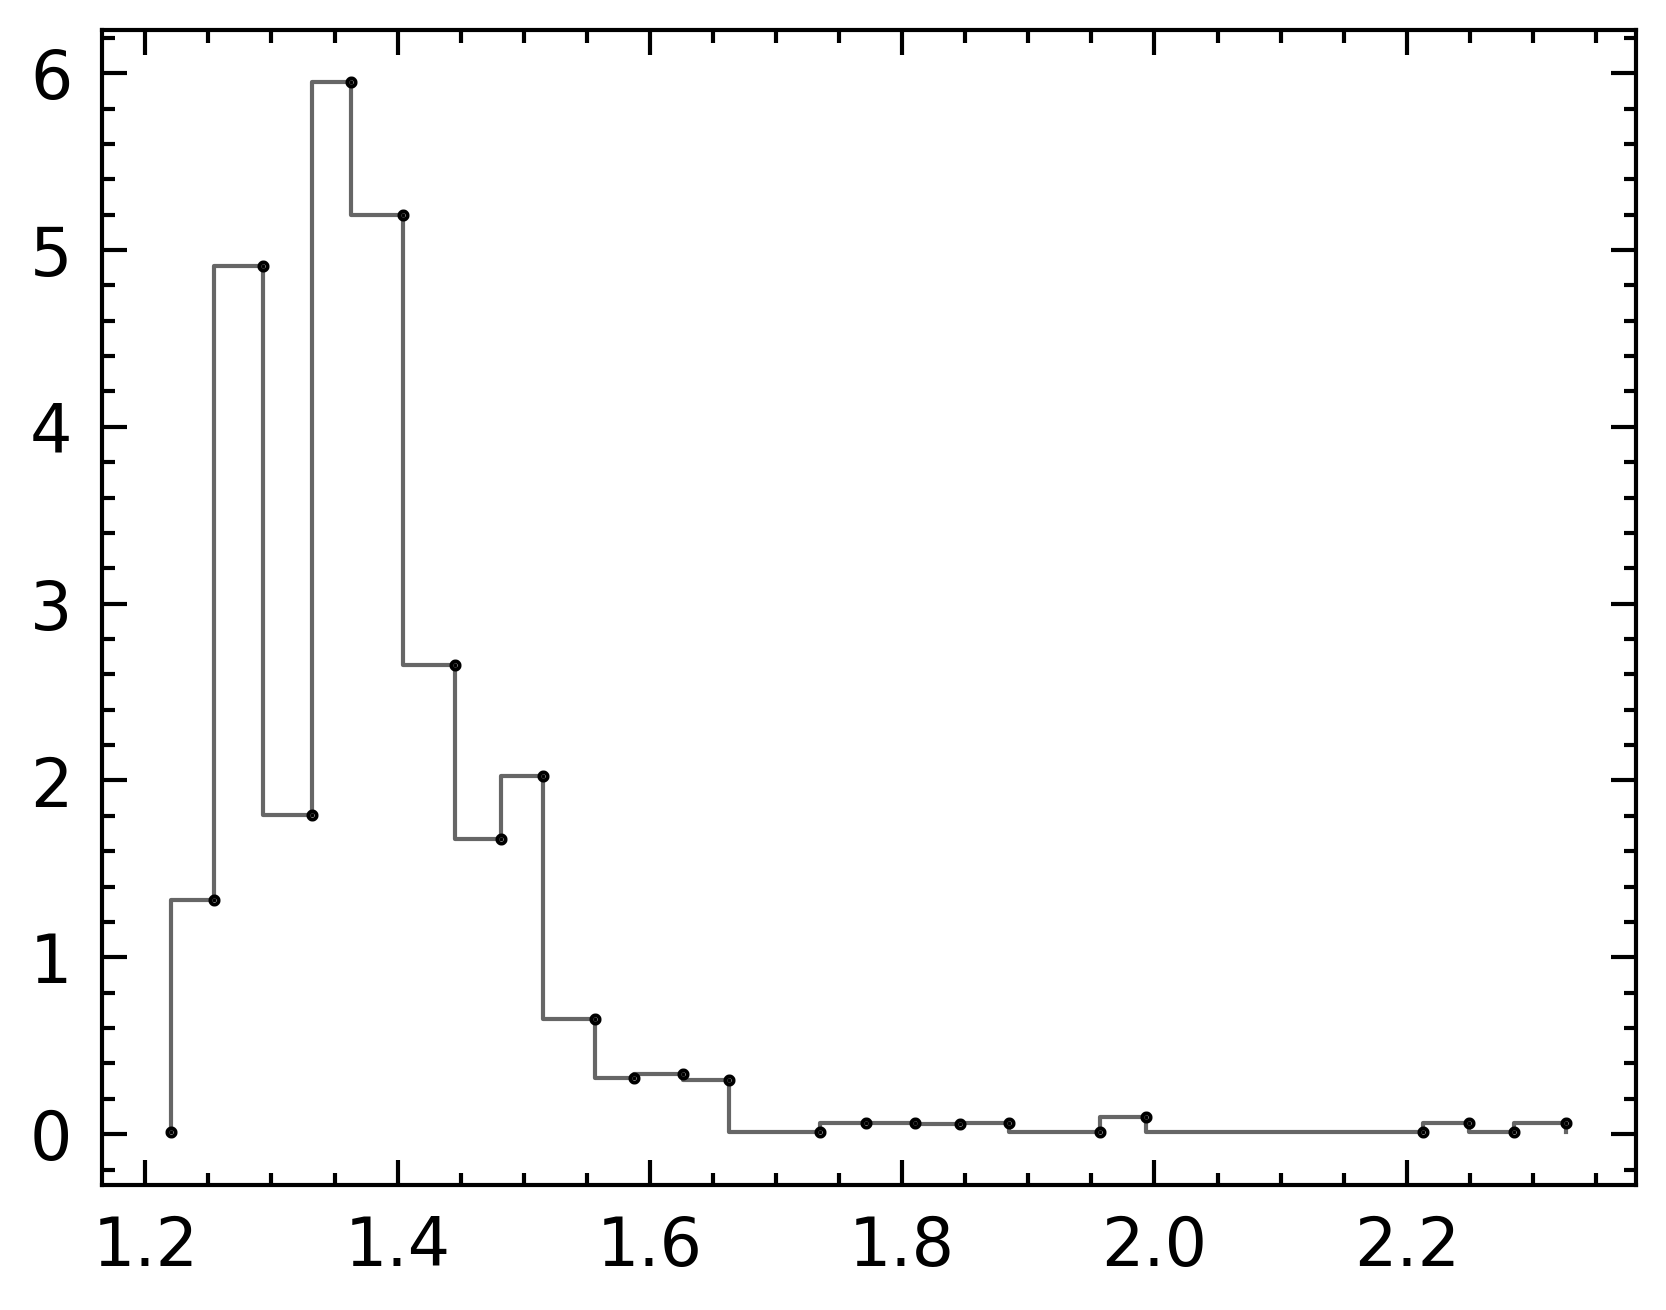

In [7]:
###woosley
woos=np.loadtxt('/home/yzq/Documents/NS_mass/BNU/NS_mass/lowblueT.txt')
plt.plot(woos[:,0],woos[:,1],ls='-',lw=0.5,color='k',alpha=0.6,label=r'$\rm{Woosley \, et \, al.(2020)}$')
##woolsley end 
plt.scatter(woos[::2,0] , woos[::2,1], s=0.2)

(array([0.70865808, 1.45795154, 2.09429799, 2.67592157, 2.05016133,
        1.04688125, 0.82840168, 0.98556774, 0.76869465, 0.62576024,
        0.47942754, 0.42977122, 0.47602924, 0.33564871, 0.43195437,
        0.43347845, 0.27293469, 0.22624416, 0.19100485, 0.14787738]),
 array([1.098, 1.158, 1.218, 1.278, 1.338, 1.398, 1.458, 1.518, 1.578,
        1.638, 1.698, 1.758, 1.818, 1.878, 1.938, 1.998, 2.058, 2.118,
        2.178, 2.238, 2.298]),
 [<matplotlib.patches.Polygon at 0x7f34552a4970>])

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


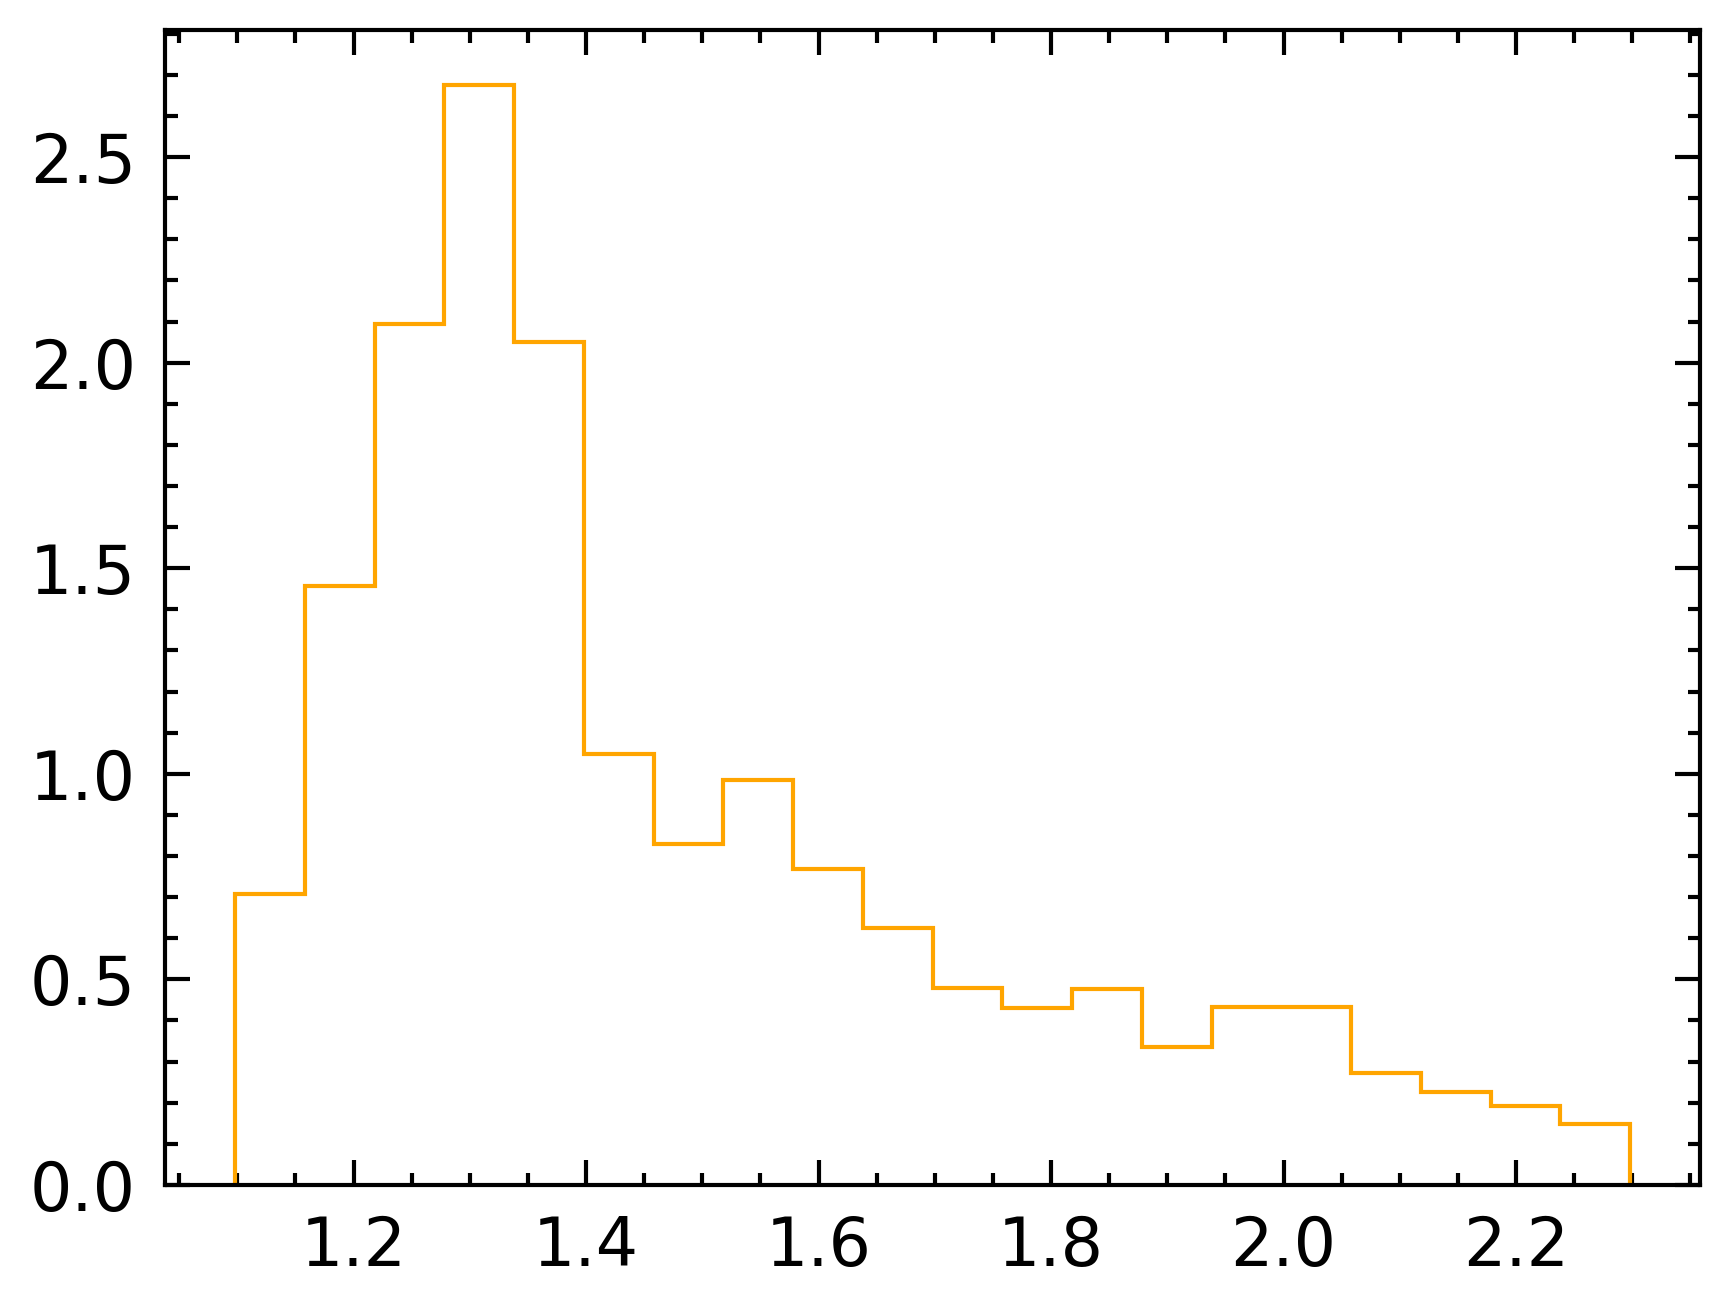

In [25]:

ana_n, ana_bins, ana_patches = plt.hist(li_data,bins=more_bins_edges,histtype='step',cumulative=True,ls='-',color='orange',lw=0.5,density=True,label=r'$\rm{20\,\,bins}$')

n, bins, patches = ax.hist(x, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical')

# Add a line showing the expected distribution.
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
y = y.cumsum()
y /= y[-1]

ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')

(array([0.04251948, 0.12999658, 0.25565446, 0.41620975, 0.53921943,
        0.6020323 , 0.65173641, 0.71087047, 0.75699215, 0.79453776,
        0.82330342, 0.84908969, 0.87765144, 0.89779037, 0.92370763,
        0.94971633, 0.96609242, 0.97966707, 0.99112736, 1.        ]),
 array([1.098, 1.158, 1.218, 1.278, 1.338, 1.398, 1.458, 1.518, 1.578,
        1.638, 1.698, 1.758, 1.818, 1.878, 1.938, 1.998, 2.058, 2.118,
        2.178, 2.238, 2.298]),
 [<matplotlib.patches.Polygon at 0x7f345511cb50>])

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


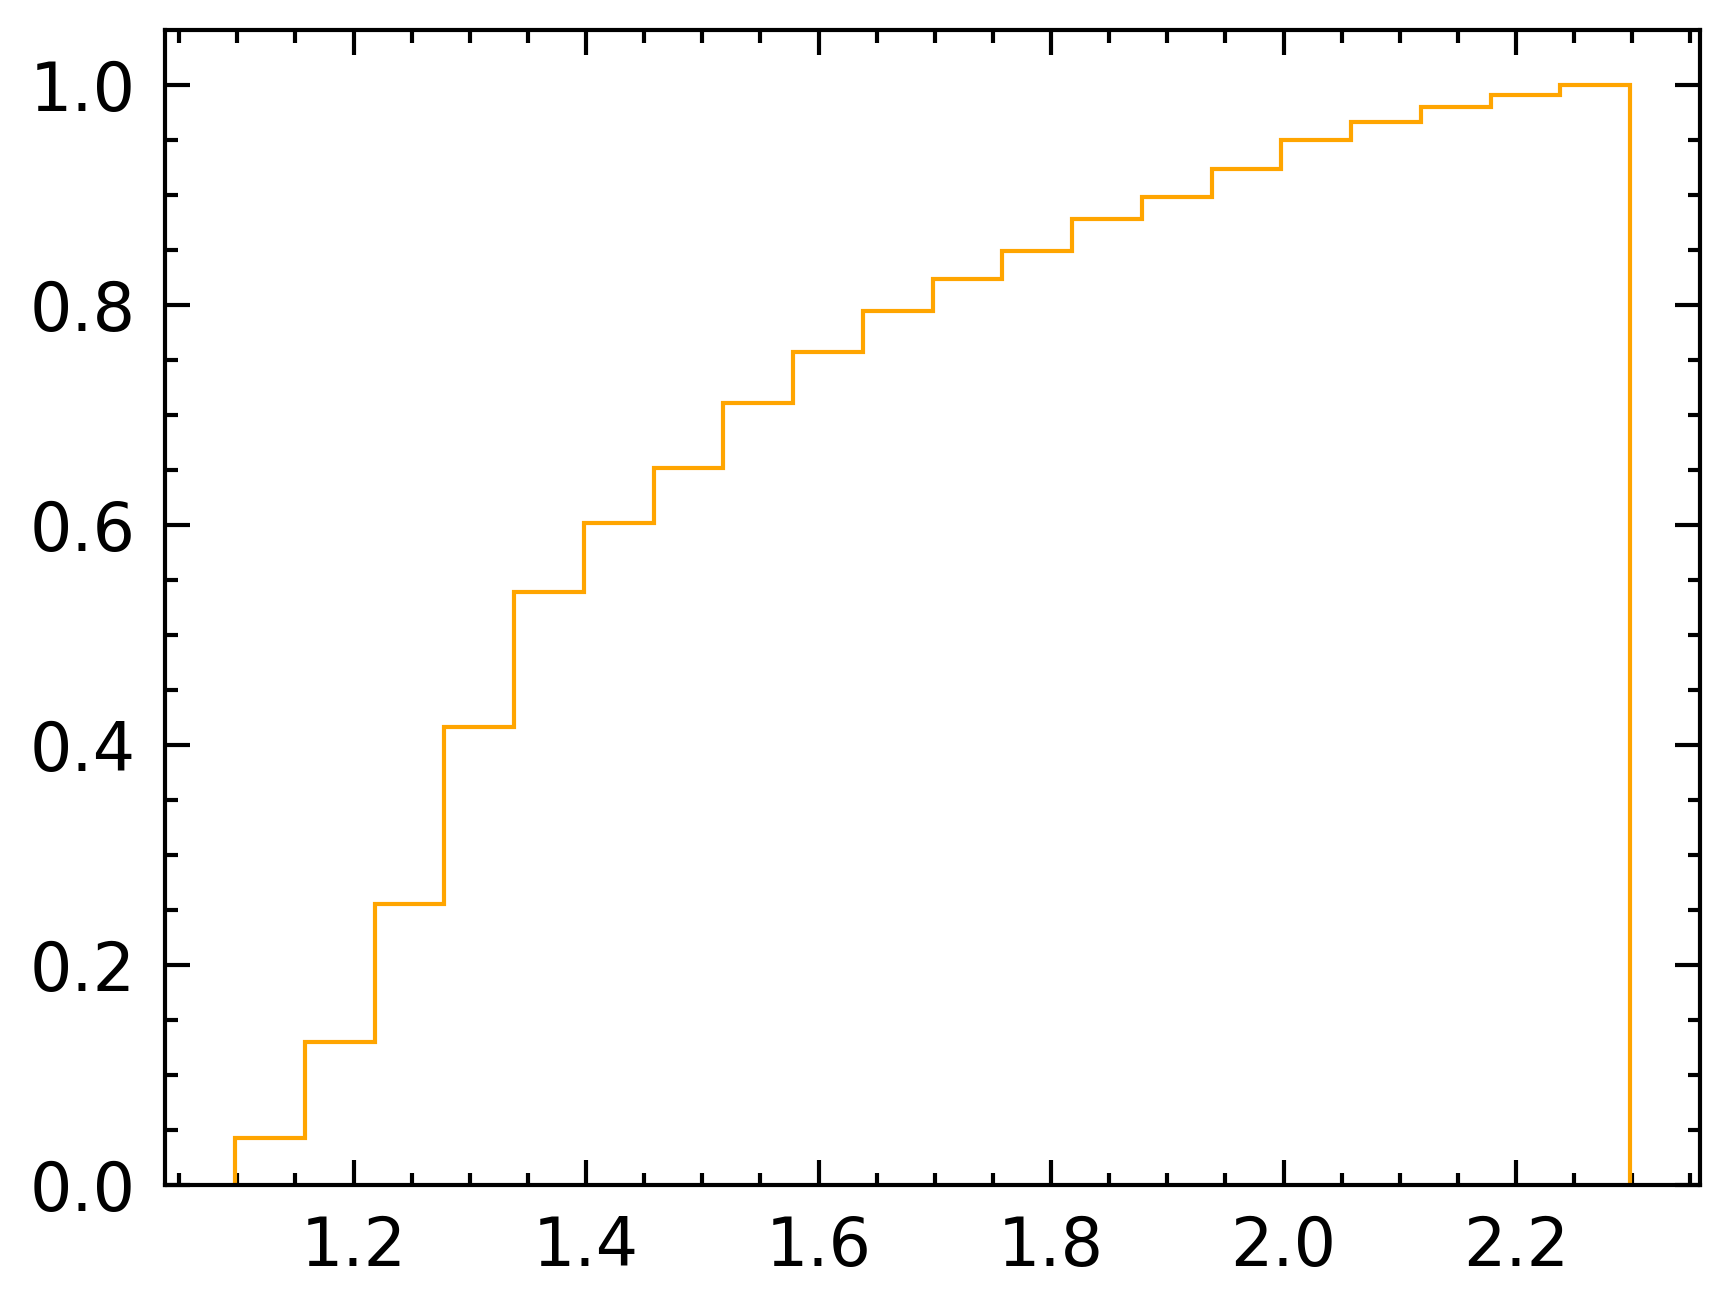

In [26]:
plt.hist(li_data,bins=more_bins_edges,histtype='step',cumulative=True,ls='-',color='orange',lw=0.5,density=True,label=r'$\rm{20\,\,bins}$')

In [8]:
woos_x=woos[::2,0]
woos_yt=woos[::2,1]
woos_y=woos_yt[1:]
delta_woos_x=woos_x[1:] - woos_x[:-1]
si_woos=np.zeros(len(woos_y))
for i in range(len(woos_y)):
    si_woos[i]=delta_woos_x[i] * woos_y[i]
s_woos=np.sum(si_woos)

In [9]:
woos_cdfi_y=np.zeros(len(si_woos) )
for i in range(len(si_woos) ):
    woos_cdfi_y[i]=np.sum( si_woos[0:(i+1)] )

In [10]:
woos_cdfi_y/s_woos

array([0.04346641, 0.22905311, 0.297288  , 0.4772589 , 0.68698148,
       0.79392787, 0.85289595, 0.91926993, 0.94552047, 0.95518114,
       0.96797457, 0.97881985, 0.97955356, 0.98183579, 0.98414389,
       0.98610052, 0.98845346, 0.98917318, 0.99265819, 0.9948855 ,
       0.99708158, 0.99744144, 1.        ])

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


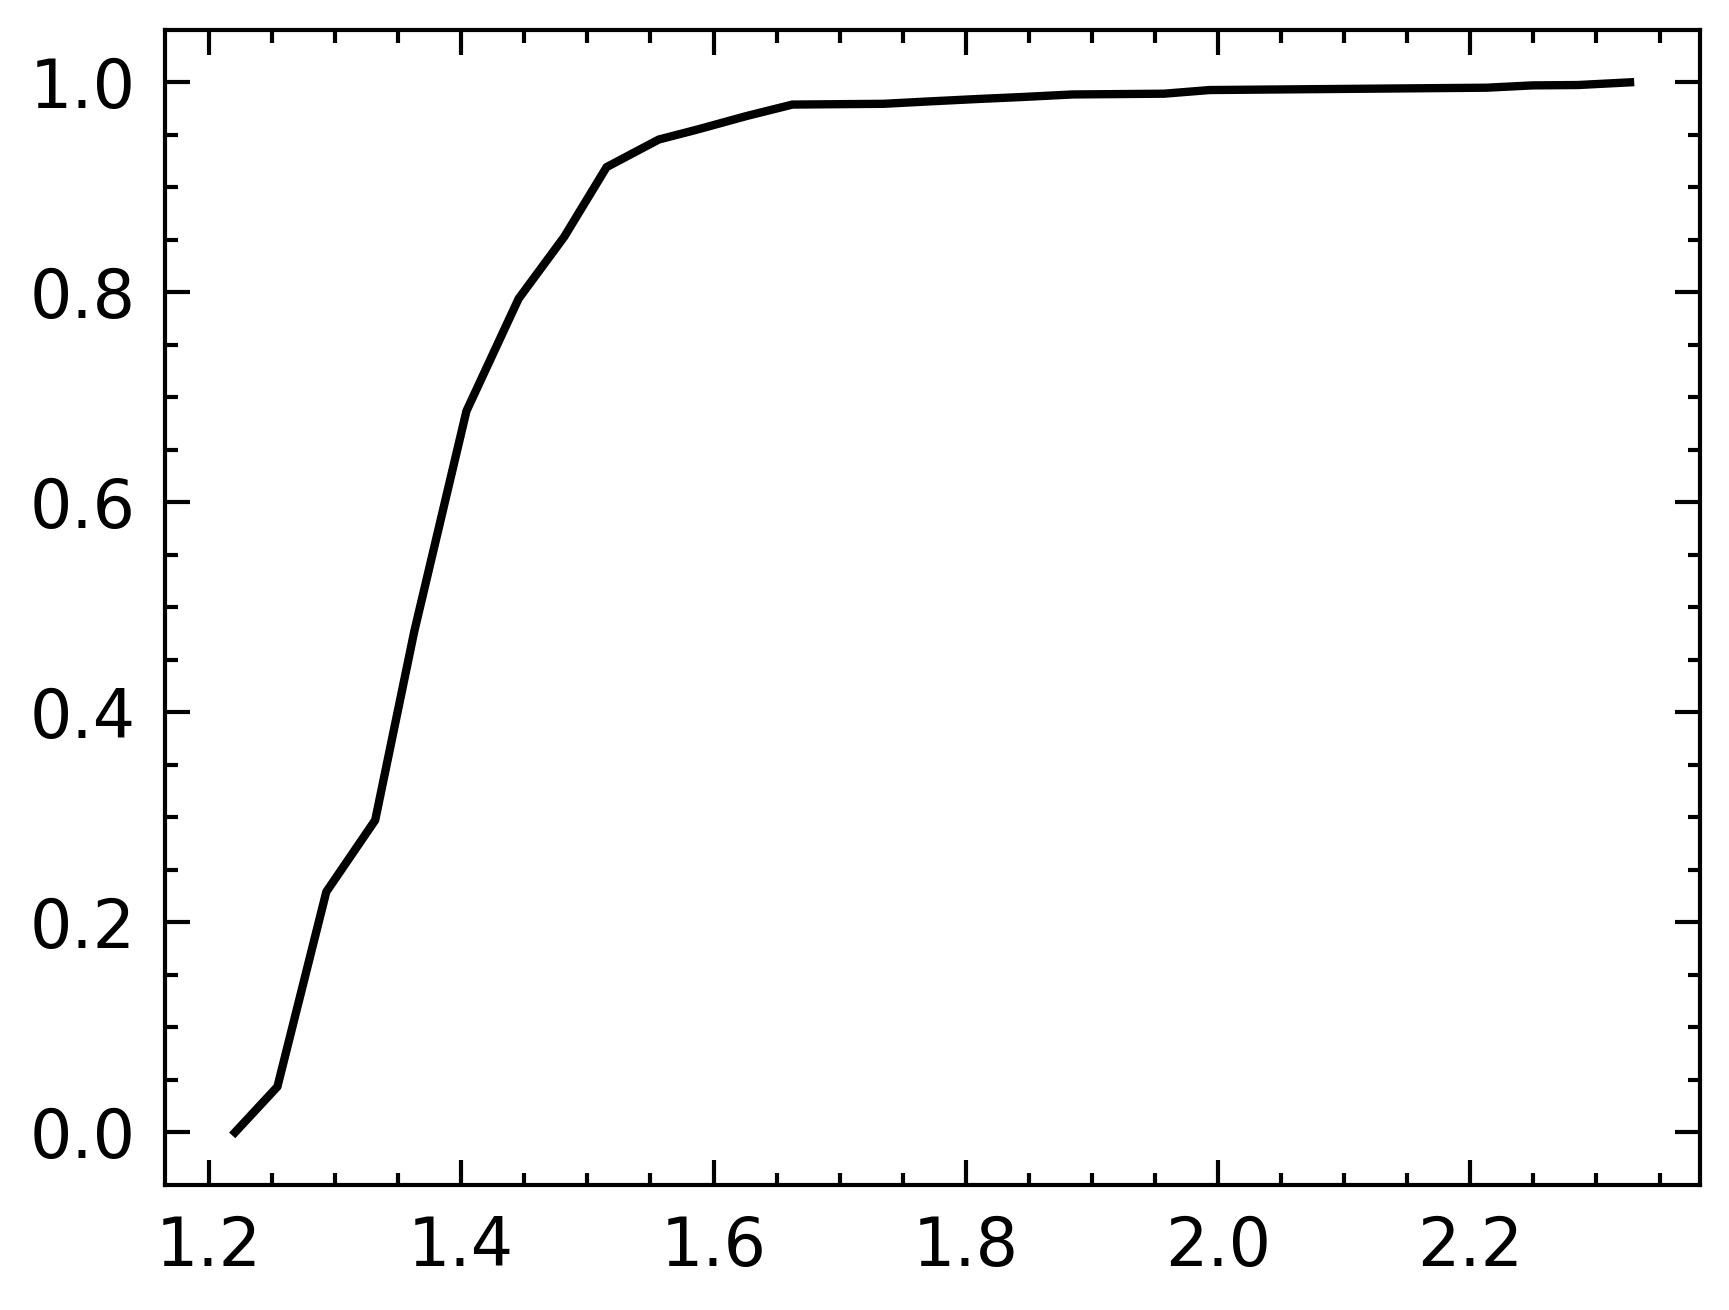

In [13]:
plt.plot(woos_x , np.concatenate([np.array([0]), woos_cdfi_y/s_woos] ) )

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


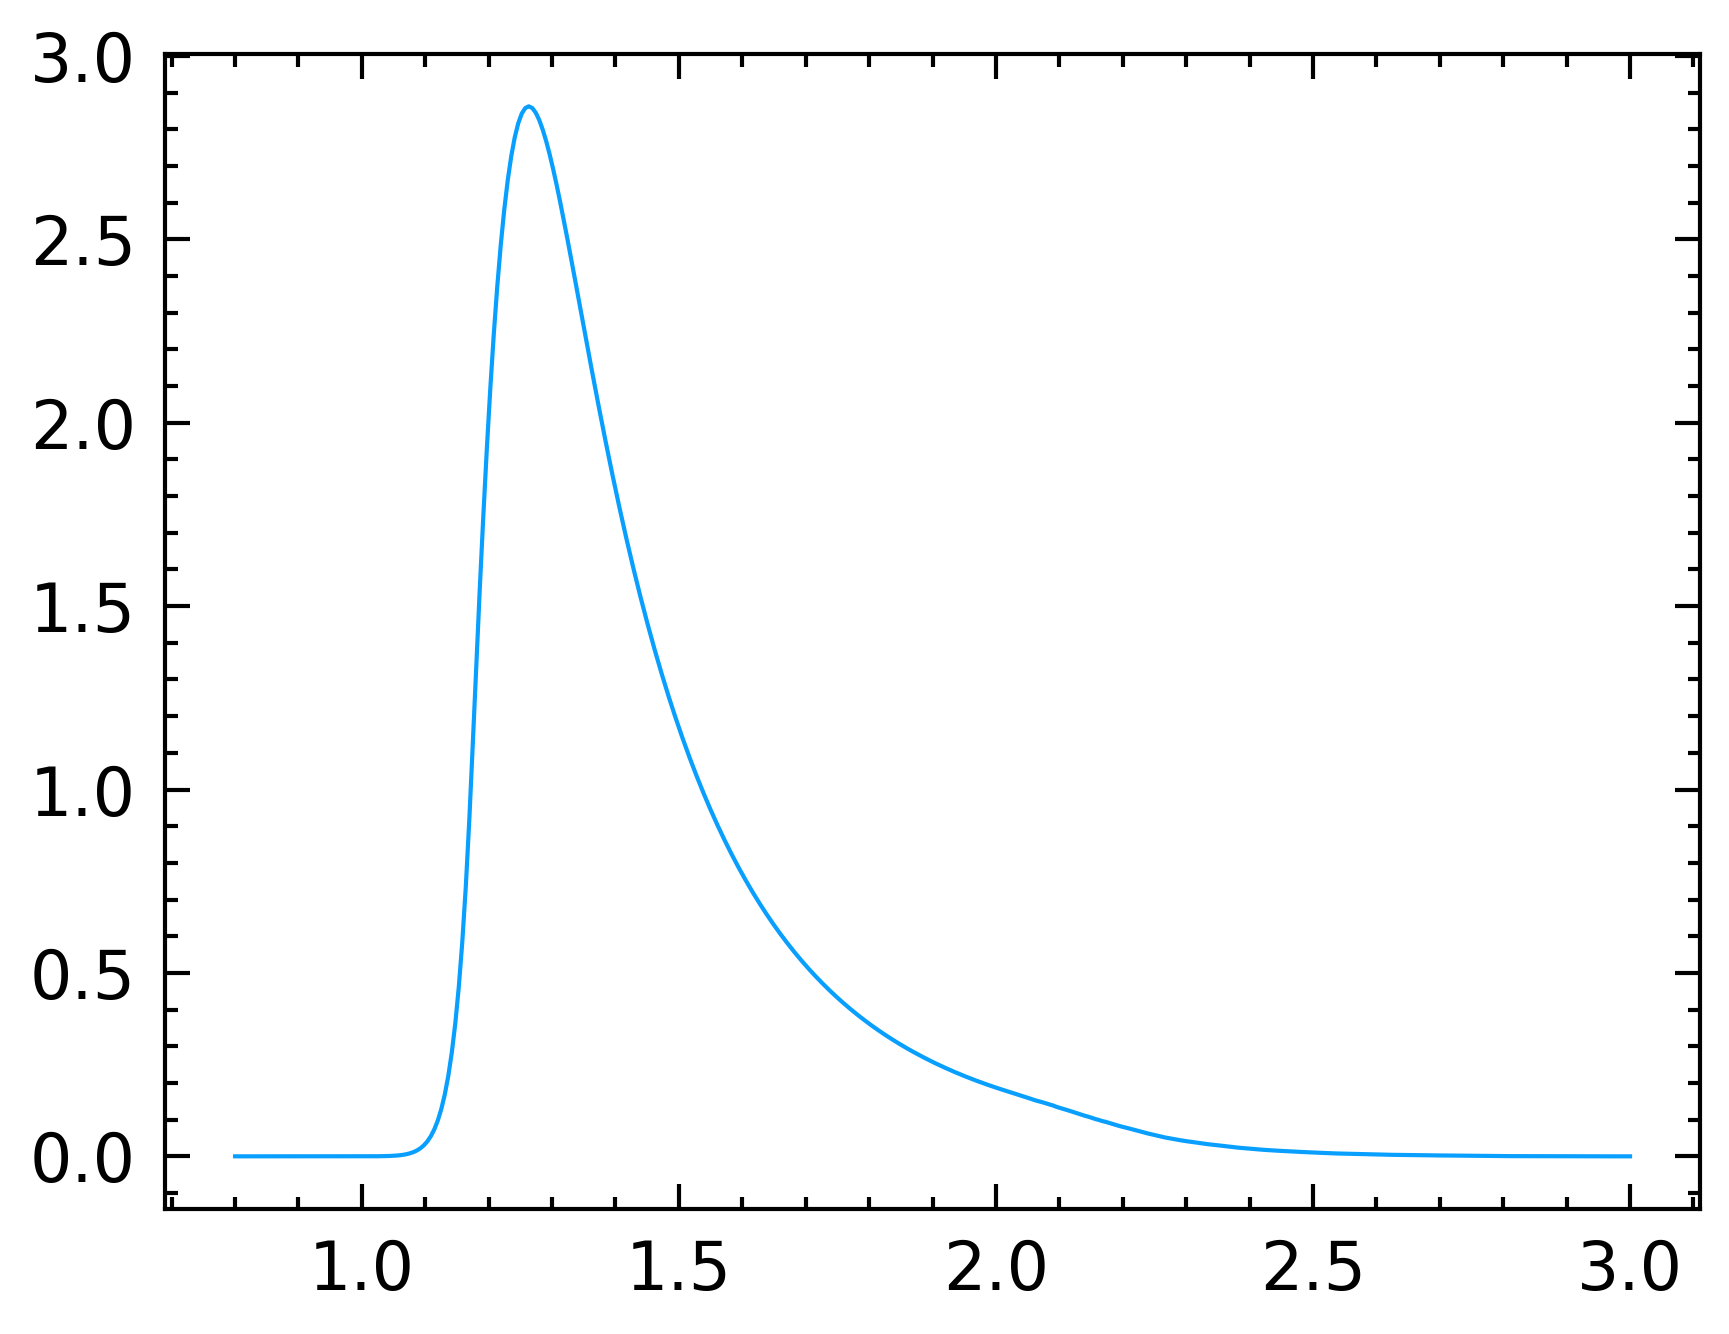

In [14]:
plt.plot(x, hfs_ppd_TOP, ls='-',color='#089FFF',lw=0.5)

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


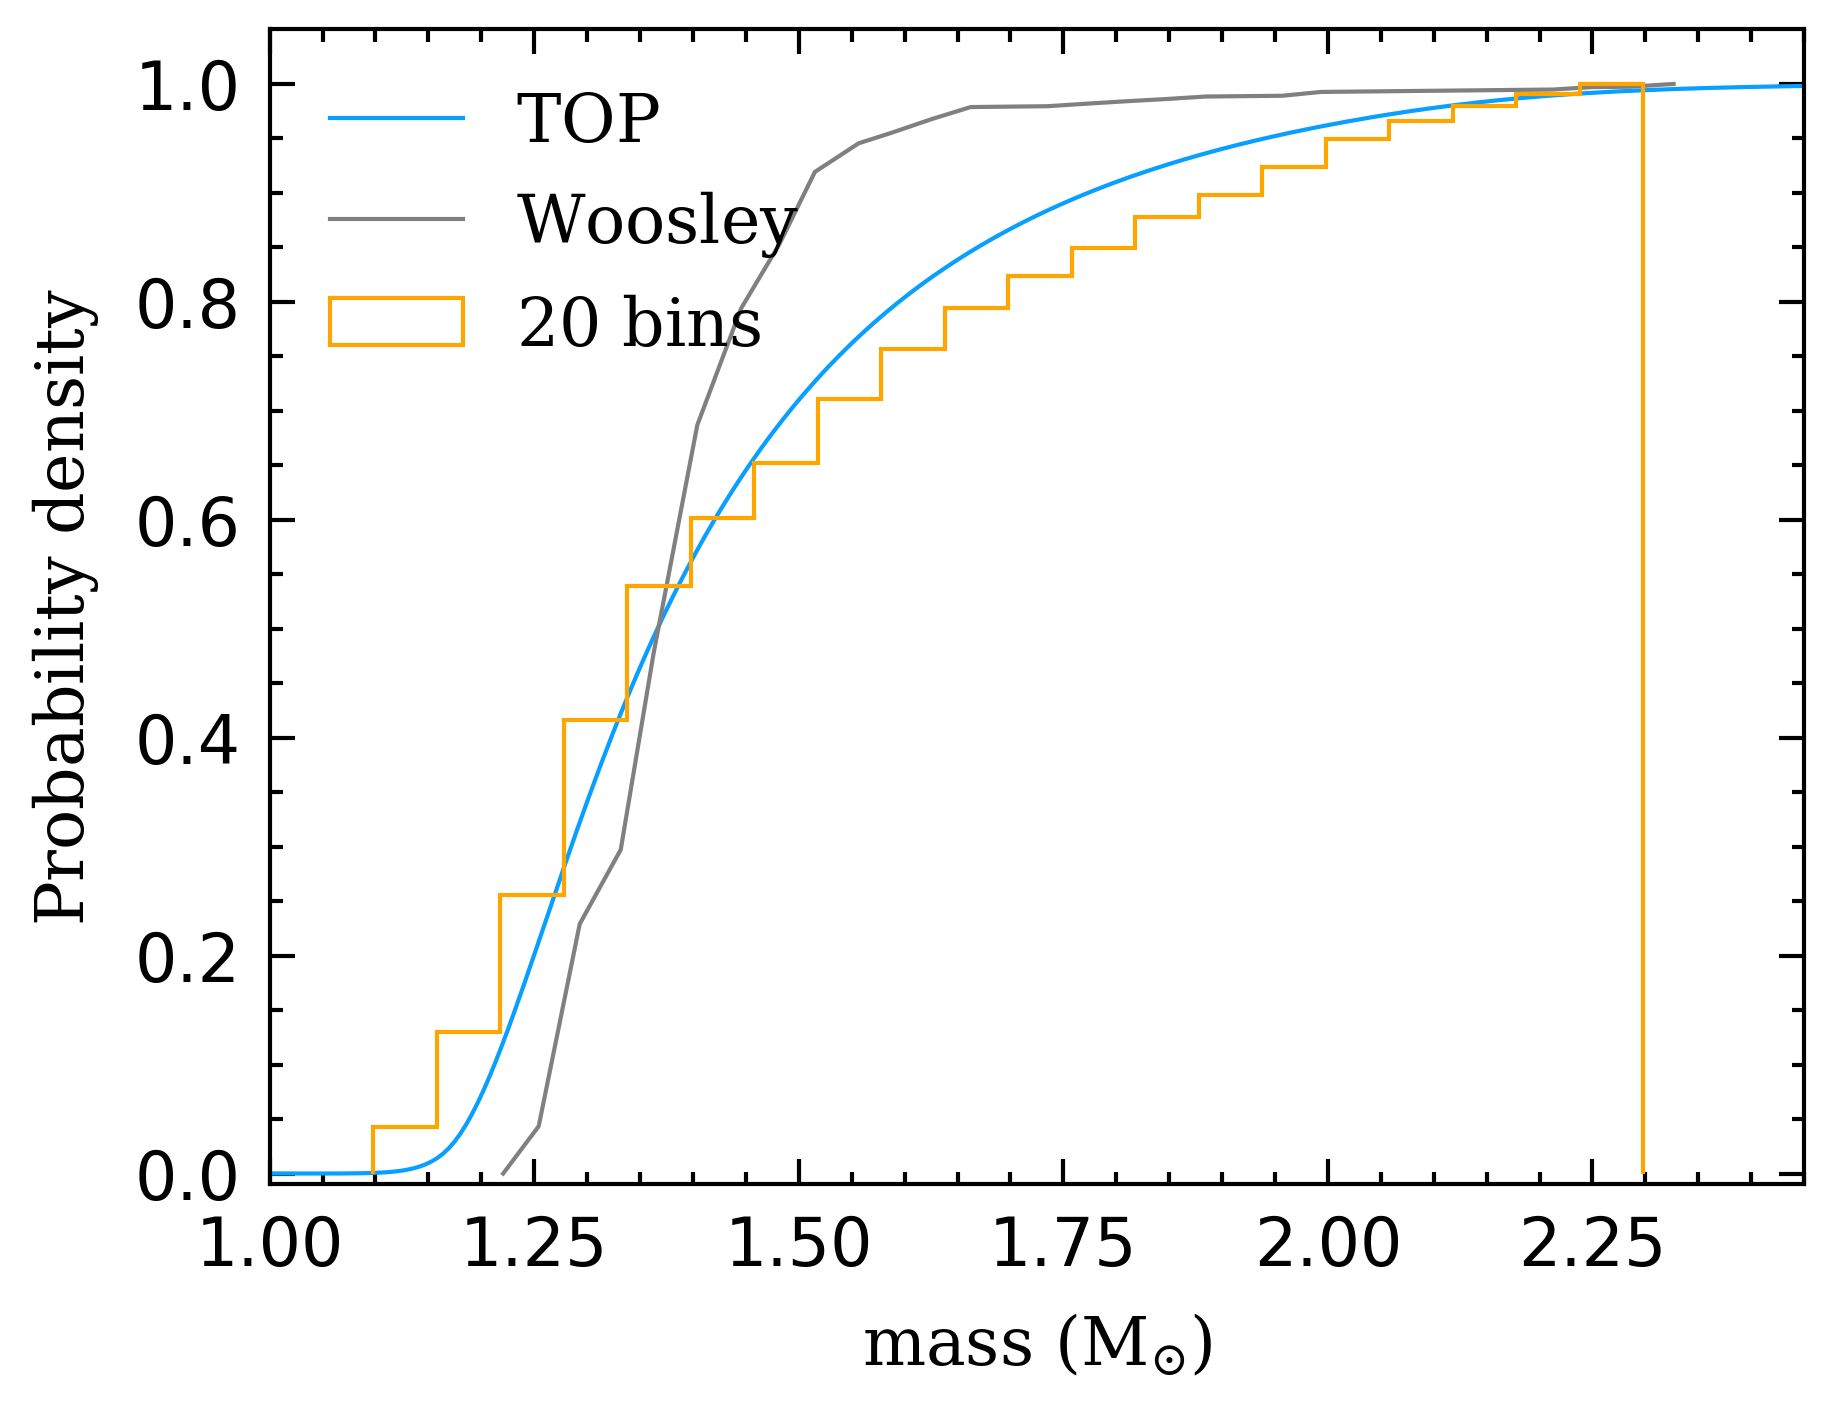

In [37]:
top_mean_dx=(x[1:] - x[:-1])[0]
top_mean_y=hfs_ppd_TOP
top_mean_si=hfs_ppd_TOP *  top_mean_dx
top_mean_s= np.sum( top_mean_si )
top_mean_cdfi_y=np.zeros(len(top_mean_si))
for i in range(len(top_mean_si)):
    top_mean_cdfi_y[i]=np.sum( top_mean_si[0:(i+1)] )
plt.plot(x, top_mean_cdfi_y,ls='-',color='#089FFF',lw=0.5,label=r'$\rm{TOP}$')
plt.plot(woos_x , np.concatenate([np.array([0]), woos_cdfi_y/s_woos] ) ,ls='-',color='grey',lw=0.5,label=r'$\rm{Woosley}$')
plt.hist(li_data,bins=more_bins_edges,histtype='step',cumulative=True,ls='-',color='orange',lw=0.5,density=True,label=r'$\rm{20\,\,bins}$')
plt.legend(loc='upper left')
plt.xlim(1.0,2.45)
plt.ylim(-0.01,1.05)
plt.xlabel(r'$\rm{mass\,\, (M_{\odot})}$')
plt.ylabel(r'$\rm{Probability\,\,density}$')
plt.savefig('cdf_ana_woosley.jpg')

### 

# other figure

In [4]:
mii=np.linspace(0.8,3,400)
i=0
j=2
phe_ppd_TOP=ppd_top(mii,post_data_model_top["post_"+str(mrms_data_label[j])+'_'+str(sub_model_name_list[i])])
phe_err_TOP=errbar_top(mii,post_data_model_top["post_"+str(mrms_data_label[j])+'_'+str(sub_model_name_list[i])])
data_phe=data_sets['data_'+str(mrms_data_label[j])]

In [20]:
hfs_ppd_TOP=phe_ppd_TOP
hfs_err_TOP=phe_err_TOP
data_hfs   =data_phe

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


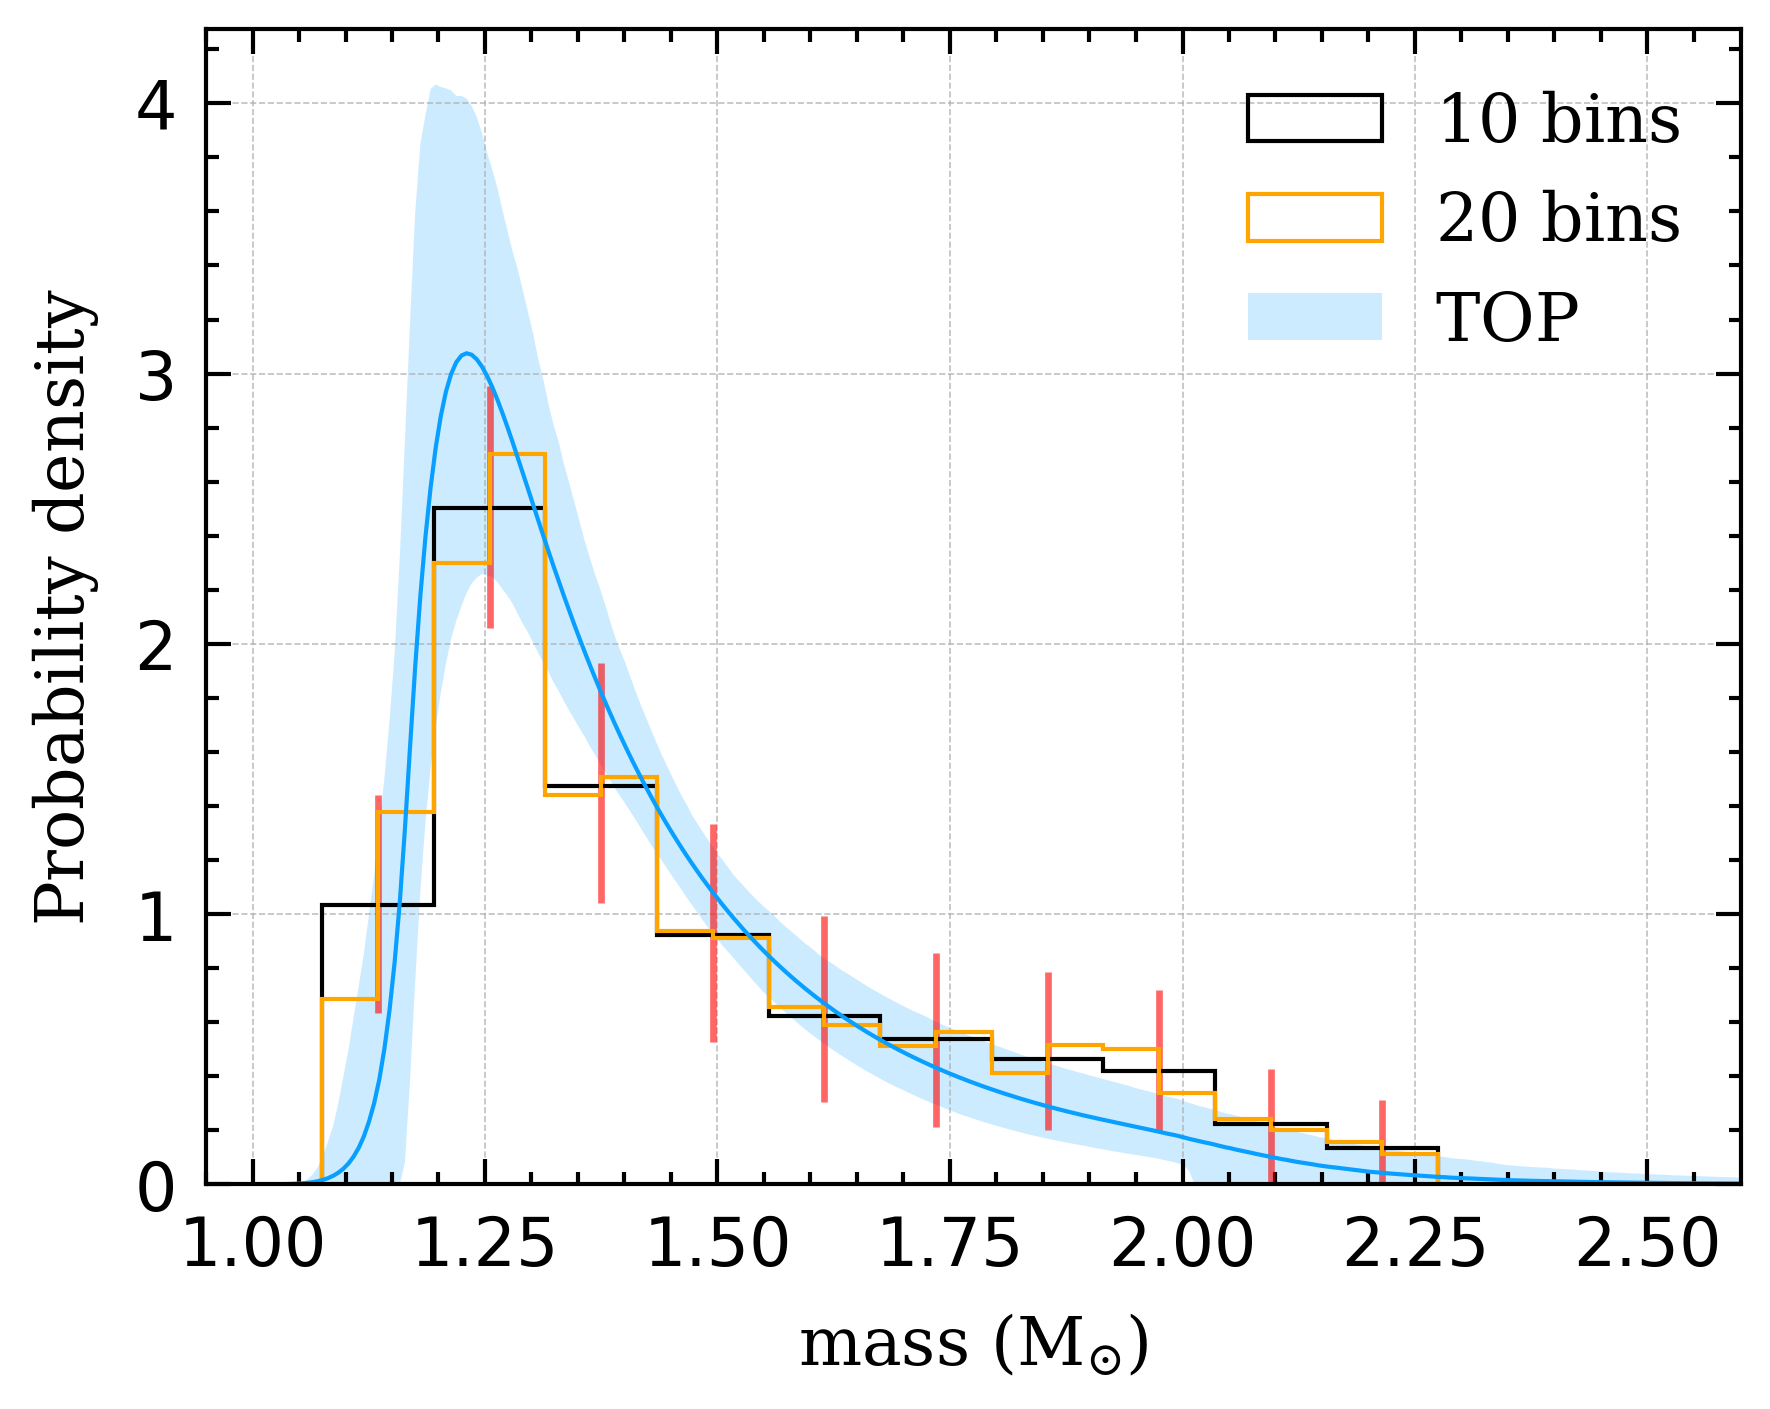

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])
plt.grid(b=True,linestyle='--',lw=0.2,alpha=0.8)

li_data=abs(data_hfs)
n_samp=10000
ne=int(len(data_hfs)/n_samp)
x=mii
dm=0.12
start_m=1.075
nbin=10


li_hist_data=np.zeros((n_samp,ne))
li_all_hist=np.zeros((n_samp,nbin))
li_mean=np.zeros(ne)
for i in range(ne):
    li_hist_data[:,i] = li_data[i*n_samp:(i+1)*n_samp]
    li_mean[i]=np.mean(li_data[i*n_samp:(i+1)*n_samp])
    
standar_bins_edges=np.zeros(nbin+1)
for i in range(nbin+1):
    standar_bins_edges[i]= start_m + i*dm

for j in range(n_samp):
    yj,standar_bins_edgesj =np.histogram(li_hist_data[j,:],standar_bins_edges,density=1)
    li_all_hist[j,:]=yj

quan_data=np.zeros((3,nbin))
err_low_up=np.zeros((2,nbin))
quan_data=np.quantile(np.array(li_all_hist),np.array([0.05 , 0.95, 0.5]), axis=0)#1-sigma[0.16,0.84]


err_low_up[0,:]=quan_data[2,:] - quan_data[0,:]
err_low_up[1,:]=quan_data[1,:] - quan_data[2,:]


bins_wide=(standar_bins_edges[1] - standar_bins_edges[0])
bins_cen=standar_bins_edges[:-1]+(standar_bins_edges[1] - standar_bins_edges[0])/2

#plt.bar(bins_cen, quan_data[2,:], width=bins_wide, align='center', facecolor='none',edgecolor='k',lw=0.5,label=r'$\rm{Li21}$')
plt.errorbar(bins_cen, quan_data[2,:], yerr=err_low_up,fmt='none',color='r',lw=0.8,alpha=0.6) #or none for no line and ponits

##part 2
standar_bins_edges=np.zeros(11)
for i in range(10+1): #bins_edges more than one size compared bins
    standar_bins_edges[i]= start_m + i*dm
plt.hist(li_data,bins=standar_bins_edges,histtype='step',ls='-',color='black',lw=0.5,density=True,label=r'$\rm{10\,\,bins}$')

more_bins_edges=np.zeros(21)
for j in range(21):
    more_bins_edges[j]=start_m + j*(dm/2)
plt.hist(li_data,bins=more_bins_edges,histtype='step',ls='-',color='orange',lw=0.5,density=True,label=r'$\rm{20\,\,bins}$')


plt.plot(x, hfs_ppd_TOP, ls='-',color='#089FFF',lw=0.5)
plt.fill_between(x, hfs_err_TOP[0,:], hfs_err_TOP[1,:],alpha=0.2, facecolor='#089FFF',label=r'$\rm{TOP}$')


plt.xlabel(r'$\rm{mass\,\, (M_{\odot})}$')
plt.ylabel(r'$\rm{Probability\,\,density}$')
plt.xlim(0.95,2.6)
#plt.ylim(0,0.6)
plt.legend(loc='upper right')

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


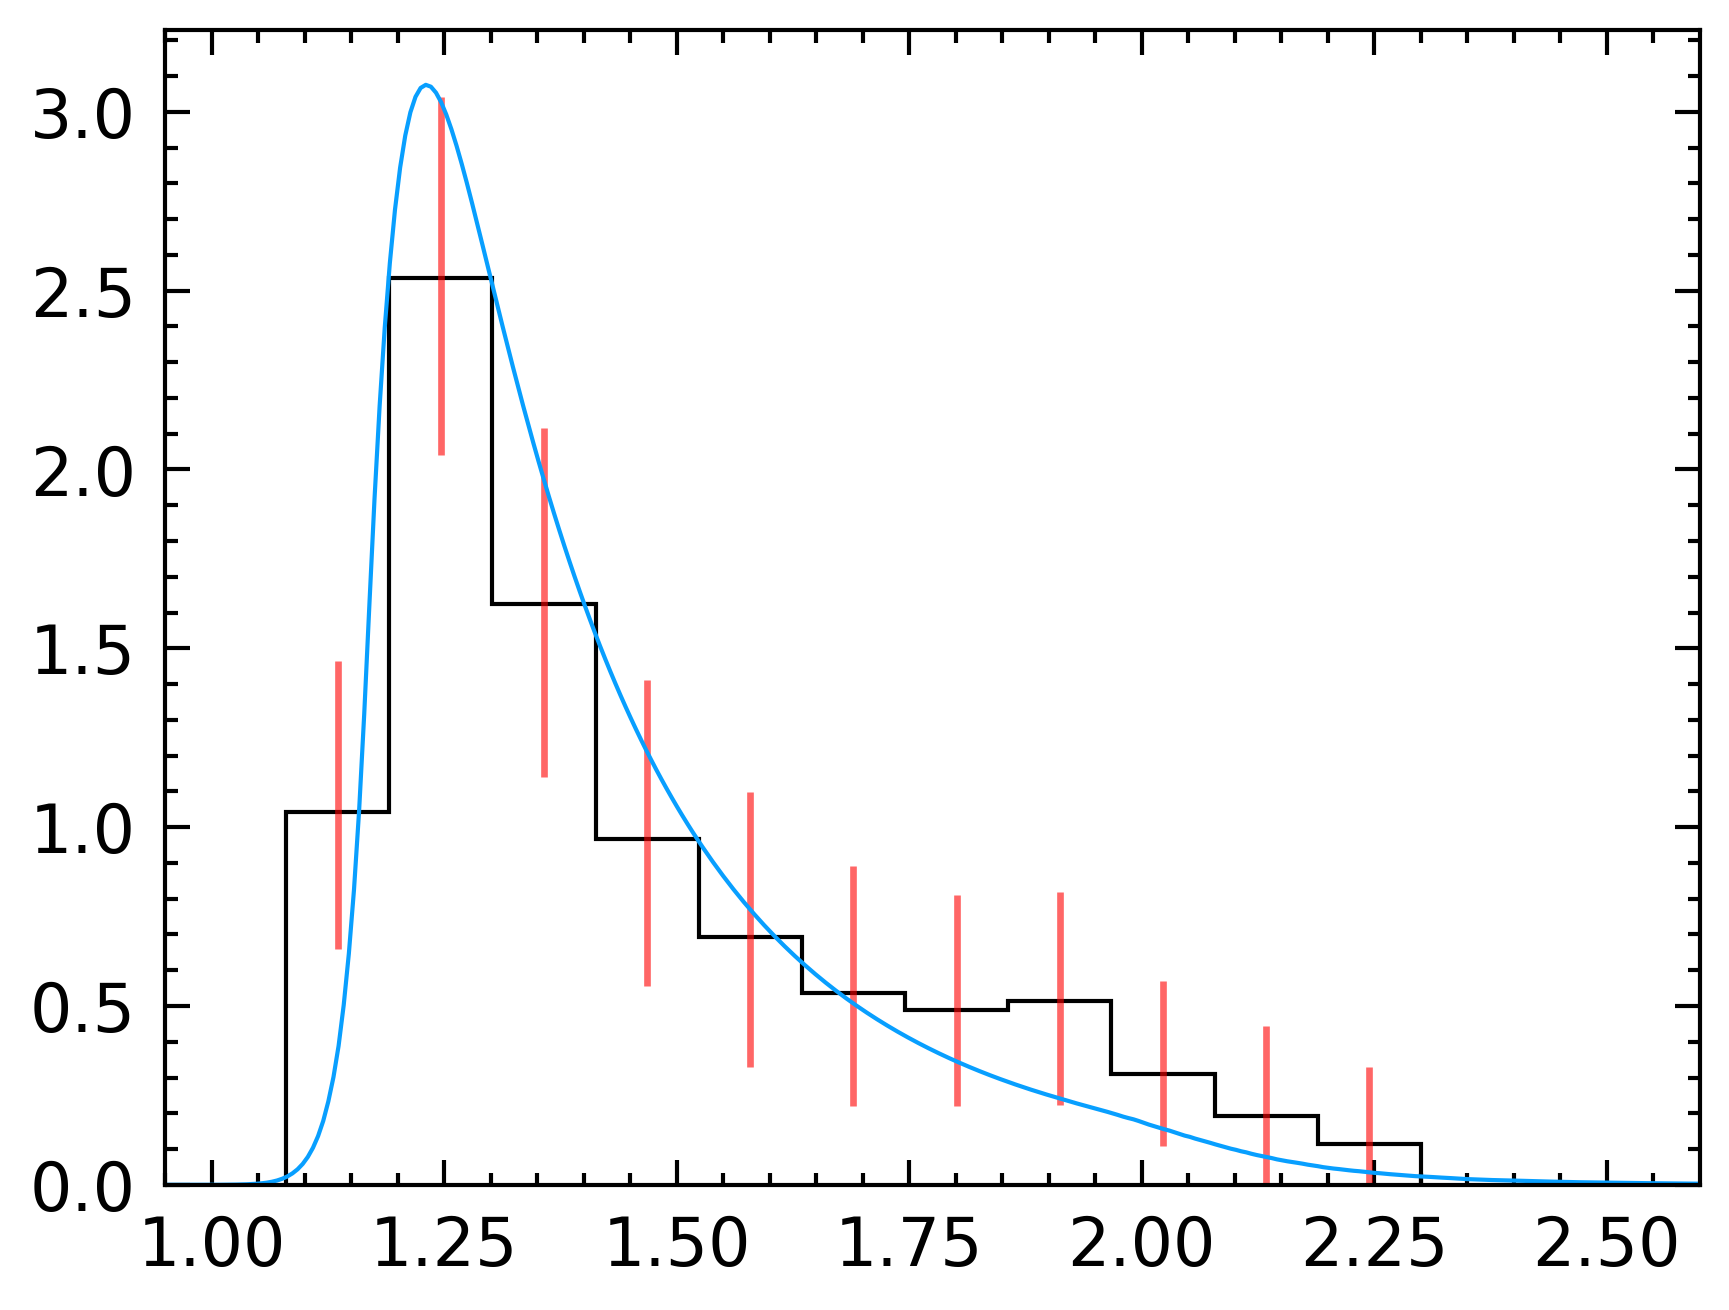

In [40]:
ne=87
n_samp=10000
nbin=11
m_start=1.08
m_end=2.3
bins_test=np.linspace(m_start,m_end,(nbin+1))
bins_c=(bins_test[1]-bins_test[0])/2 + bins_test[:-1]
li_data=abs(data_hfs)

li_all_hist=np.zeros((n_samp,nbin))
li_mean=np.zeros(ne)
for i in range(ne):
    li_hist_data[:,i] = li_data[i*n_samp:(i+1)*n_samp]

for j in range(n_samp):
    yj,standar_bins_edgesj =np.histogram(li_hist_data[j,:],bins_test,density=1)
    li_all_hist[j,:]=yj

quan_data=np.zeros((3,nbin))
err_low_up=np.zeros((2,nbin))
quan_data=np.quantile(np.array(li_all_hist),np.array([0.05 , 0.95, 0.5]), axis=0)#1-sigma[0.16,0.84]
err_low_up[0,:]=quan_data[2,:] - quan_data[0,:]
err_low_up[1,:]=quan_data[1,:] - quan_data[2,:]

plt.hist(li_data,bins=bins_test,histtype='step',ls='-',color='black',lw=0.5,density=True,label=r'$\rm{10\,\,bins}$')
plt.errorbar(bins_c, quan_data[2,:], yerr=err_low_up,fmt='none',color='r',lw=0.8,alpha=0.6)

plt.plot(x, hfs_ppd_TOP, ls='-',color='#089FFF',lw=0.5)
plt.xlim(0.95,2.6);

# ana+phe vs obs

In [3]:
mrms_data_label=['ns_obs','ana_corrected_mrms_87','phe_corrected_mrms_87','ana_corrected_mr_53','phe_corrected_mr_53','mr_obs_53','ms_34']
############# j=   0                1                       2                      3                       4                  5      6
sub_model_name_list=['turn_on_pow','turn_on_pow_fix','turn_on_pow_G','pow', '2G','turn_on_pow_G_fixed_max','G','2G_fixed_max', 'sst', 'G_fixed_max', '2G_fixed_min','2G_fixed_max_min','logu','3G_fixed_max_min','lognorm','gamma', 'U','G_fixed_max_min']
############ i=           0(4)       1(3)                2(7)         3(3)   4(7)            5(6)          6(4)       7(6)     8(4)        9(3)            10(6)              11(5)     12(2)      13(8)           14(2)    15(2)  16(2)      17(2)   
data_name_labes=[r'$\rm{OBS}$',r'$\rm{ANA}$',r'$\rm{PHE}$',r'$\rm{ANA_{m_r}}$',r'$\rm{PHE_{m_r}}$',r'$\rm{m_r}$',r'$\rm{m_s}$']
model_name_label=[r'$\rm{TOP}$',r'$\rm{TOP_{min}}$',r'$\rm{TOPG}$',r'$\rm{POW}$',r'$\rm{2G^{max}_{min}}$',r'$\rm{TOPG_{min}}$',r'$\rm{G^{max}_{min}}$',r'$\rm{2G_{min}}$',r'$\rm{SST}$',r'$\rm{G_{min}}$',r'$\rm{2G_{max}}$',r'$\rm{2G}$',r'$\rm{LogU}$',r'$\rm{3G}$',r'$\rm{LogN}$',r'$\rm{Gamma}$',r'$\rm{U}$',r'$\rm{G}$']
###########i
main_direct='/home/yzq/Documents/NS_mass/BNU/NS_mass/NS_sci/NS_mass_2023/'
##########
post_data_model_top={}
data_sets={}
i=0
for j in [0,1,2]:
    os.path.exists(main_direct+'{}/{}/hy_outdir/*.json'.format(mrms_data_label[j],sub_model_name_list[i]) )
    fnames= glob.glob( main_direct+'{}/{}/hy_outdir/*.json'.format(mrms_data_label[j],sub_model_name_list[i])  )
    fname=fnames[0]
    re=bilby.result.read_in_result( fname )
    temp_post=((re.posterior).iloc[:,0:-2]).values 
    post_data_model_top["post_"+str(mrms_data_label[j])+'_'+str(sub_model_name_list[i])]=temp_post
    
    os.path.exists(main_direct + '{}.txt'.format(mrms_data_label[j]) )
    data_names=glob.glob(main_direct + '{}.txt'.format(mrms_data_label[j]) )
    datname=data_names[0]
    data_sets['data_'+str(mrms_data_label[j])]=np.loadtxt(main_direct + '{}.txt'.format(mrms_data_label[j]) )

In [4]:
#ppd for turn on power law
i=0 #top
mass_model=eval('utilizes_plot.hyper_prior_{}'.format(sub_model_name_list[i]) )
def ppd_top(x,pos_p):
    mar=list()
    row, col=pos_p.shape
    for i in range(row):
        ma = mass_model(np.array(x),pos_p[i,0],pos_p[i,1],pos_p[i,2],pos_p[i,3]) 
        mar.append(ma) 
    return np.sum(np.array(mar),axis=0)/row

def errbar_top(x,pos_p):
    mar=list()
    row, col=pos_p.shape
    for i in range(row):
        ma=mass_model(np.array(x),pos_p[i,0],pos_p[i,1],pos_p[i,2],pos_p[i,3]) 
        mar.append(ma)
    return np.quantile(np.array(mar),np.array([0.05 , 0.95]), axis=0)

In [5]:
ana_plus_phe_top_post=np.concatenate( (post_data_model_top["post_"+str(mrms_data_label[1])+'_'+str(sub_model_name_list[0])],
                                    post_data_model_top["post_"+str(mrms_data_label[2])+'_'+str(sub_model_name_list[0])] ), axis=0)

In [6]:
data_ana_plus_phe=  np.concatenate( ( data_sets['data_'+str(mrms_data_label[1])] , data_sets['data_'+str(mrms_data_label[2])] ), axis=0)

In [7]:
mii=np.linspace(0.8,3,400)

ana_plus_phe_ppd_TOP=ppd_top(mii,ana_plus_phe_top_post)
ana_plus_phe_err_TOP=errbar_top(mii,ana_plus_phe_top_post)

In [8]:
hfs_ppd_TOP=ana_plus_phe_ppd_TOP
hfs_err_TOP=ana_plus_phe_err_TOP
data_hfs   =data_ana_plus_phe

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


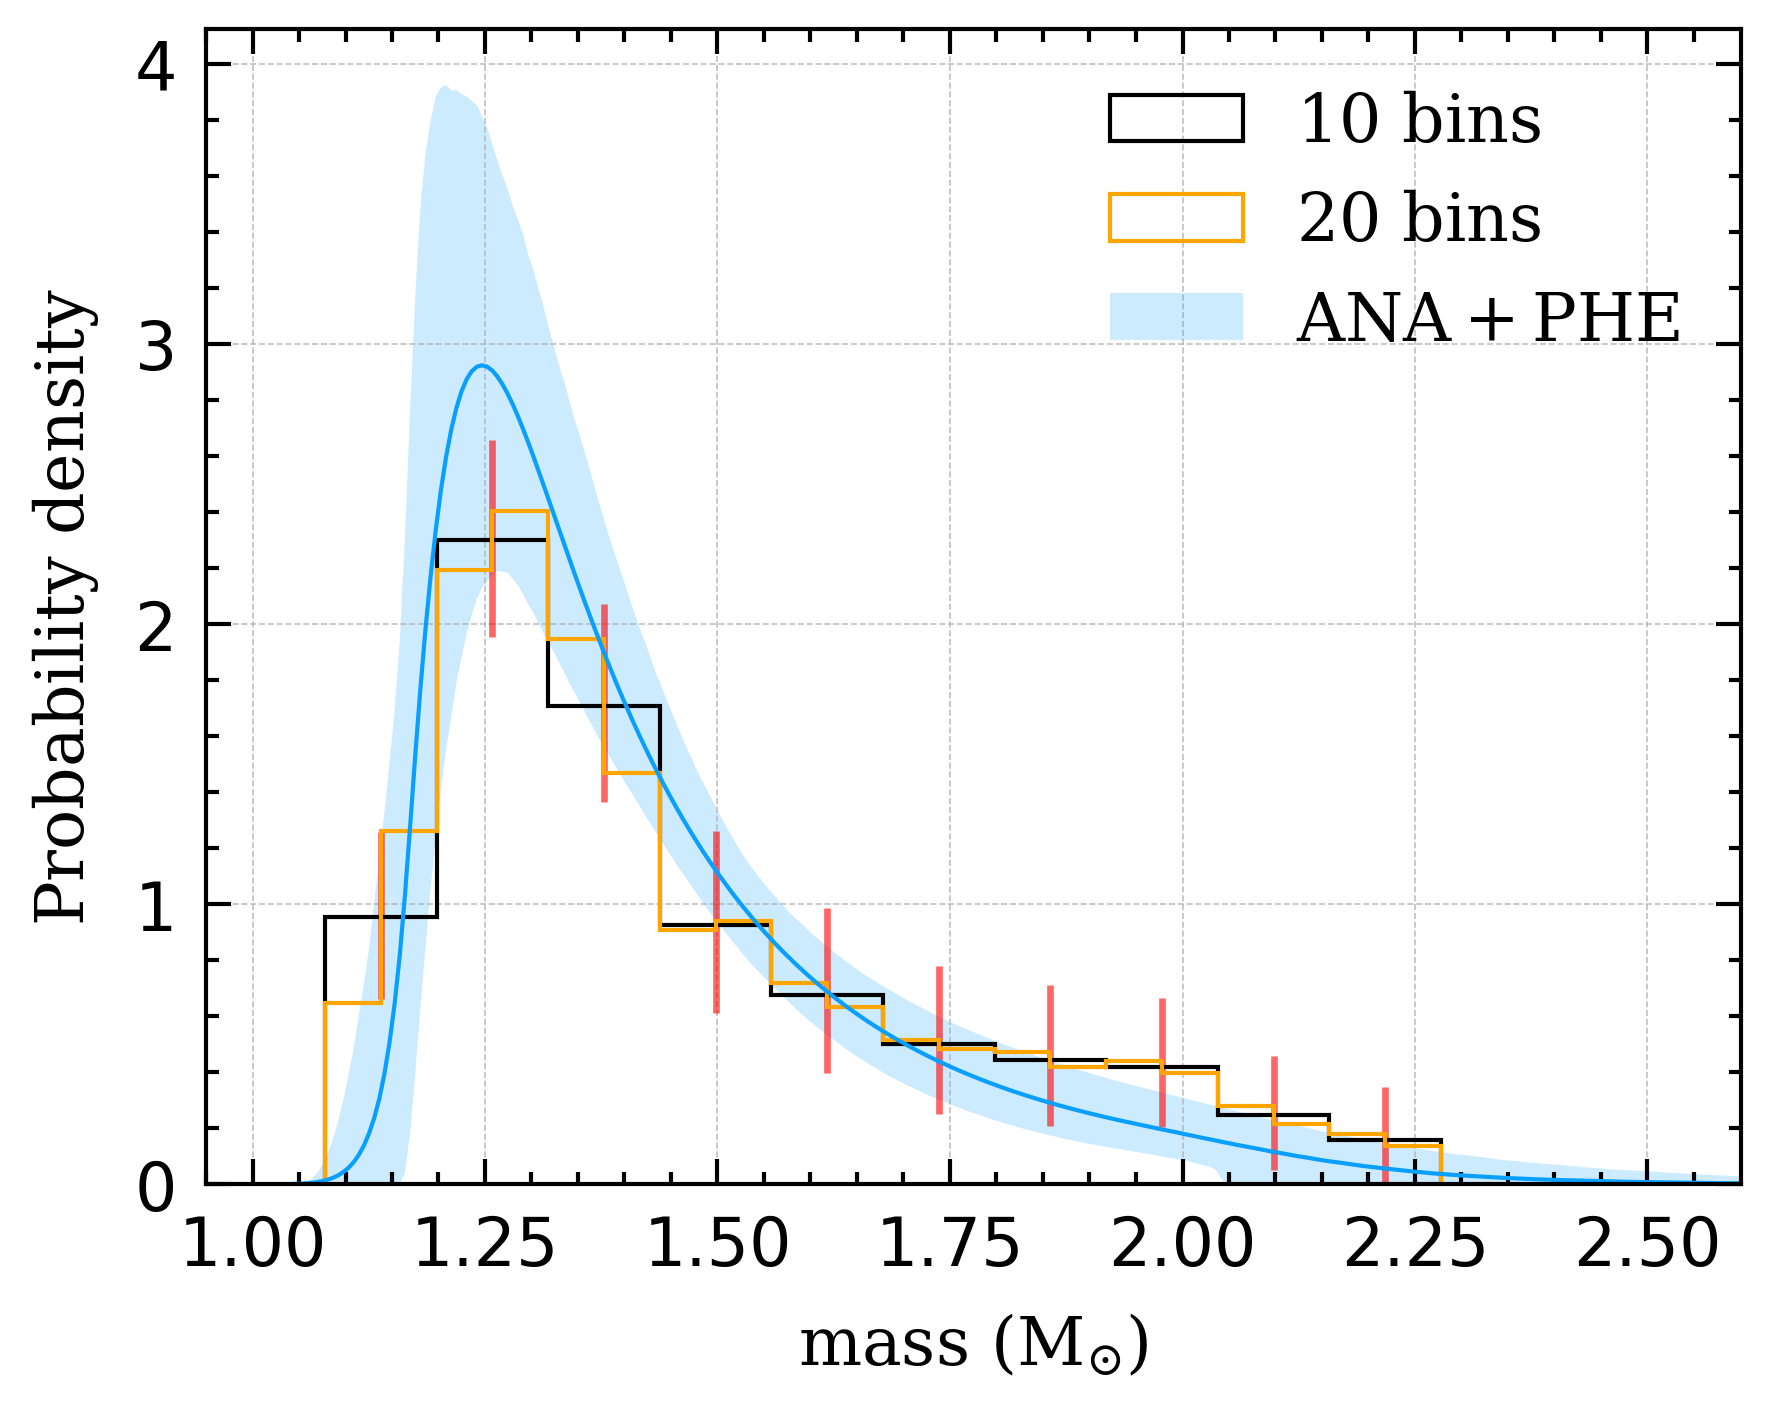

In [18]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])
plt.grid(b=True,linestyle='--',lw=0.2,alpha=0.8)

li_data=abs(data_hfs)
n_samp=10000
ne=int(len(data_hfs)/n_samp)
x=mii
dm=0.12
start_m=1.078
nbin=10
highb=21


li_hist_data=np.zeros((n_samp,ne))
li_all_hist=np.zeros((n_samp,nbin))
li_mean=np.zeros(ne)
for i in range(ne):
    li_hist_data[:,i] = li_data[i*n_samp:(i+1)*n_samp]
    li_mean[i]=np.mean(li_data[i*n_samp:(i+1)*n_samp])
    
standar_bins_edges=np.zeros(nbin+1)
for i in range(nbin+1):
    standar_bins_edges[i]= start_m + i*dm

for j in range(n_samp):
    yj,standar_bins_edgesj =np.histogram(li_hist_data[j,:],standar_bins_edges,density=1)
    li_all_hist[j,:]=yj

quan_data=np.zeros((3,nbin))
err_low_up=np.zeros((2,nbin))
quan_data=np.quantile(np.array(li_all_hist),np.array([0.05 , 0.95, 0.5]), axis=0)#1-sigma[0.16,0.84]


err_low_up[0,:]=quan_data[2,:] - quan_data[0,:]
err_low_up[1,:]=quan_data[1,:] - quan_data[2,:]


bins_wide=(standar_bins_edges[1] - standar_bins_edges[0])
bins_cen=standar_bins_edges[:-1]+(standar_bins_edges[1] - standar_bins_edges[0])/2

#plt.bar(bins_cen, quan_data[2,:], width=bins_wide, align='center', facecolor='none',edgecolor='k',lw=0.5,label=r'$\rm{Li21}$')
plt.errorbar(bins_cen, quan_data[2,:], yerr=err_low_up,fmt='none',color='r',lw=0.8,alpha=0.6) #or none for no line and ponits

##part 2
standar_bins_edges=np.zeros(nbin+1)
for i in range(nbin+1): #bins_edges more than one size compared bins
    standar_bins_edges[i]= start_m + i*dm
plt.hist(li_data,bins=standar_bins_edges,histtype='step',ls='-',color='black',lw=0.5,density=True,label=r'$\rm{10\,\,bins}$')

more_bins_edges=np.zeros(highb)
for j in range(highb):
    more_bins_edges[j]=start_m + j*(dm/2)
plt.hist(li_data,bins=more_bins_edges,histtype='step',ls='-',color='orange',lw=0.5,density=True,label=r'$\rm{20\,\,bins}$')


plt.plot(x, hfs_ppd_TOP, ls='-',color='#089FFF',lw=0.5)
plt.fill_between(x, hfs_err_TOP[0,:], hfs_err_TOP[1,:],alpha=0.2, facecolor='#089FFF',label=r'$\rm{ANA+PHE}$')


plt.xlabel(r'$\rm{mass\,\, (M_{\odot})}$')
plt.ylabel(r'$\rm{Probability\,\,density}$')
plt.xlim(0.95,2.6)
#plt.ylim(0,0.6)
plt.legend(loc='upper right')
#plt.savefig('hist_ppd_err_ana_plus_phe.jpg')